In [8]:
import numpy as np
from neuralnet import *
from train import *
from util import *
import matplotlib.pyplot as plt
from gradient import *
import tqdm
''
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df=load_data('data')
train_X, train_y, val_X, val_y,  test_X, test_y = df

In [11]:
test_X.shape

(10000, 3072)

In [3]:
config = util.load_config('configs/config_2b.yaml')
x_train = train_X[:128]
y_train = train_y[:128]
checkGradient(x_train,y_train,config)


In [7]:
!python3 -m main --experiment 'test_gradients'

3.890187359799433e-14


In [8]:
def check_grad(model, x_train, y_train):

    """
    TODO
        Checks if gradients computed numerically are within O(epsilon**2)

        args:
            model
            x_train: Small subset of the original train dataset
            y_train: Corresponding target labels of x_train

        Prints gradient difference of values calculated via numerical approximation and backprop implementation
    """
    #Create Model
    #model=Neuralnetwork(config)

    #Defien epsilon and wieght to be tested
    epsilon = 1.e-2
    layer_idx, w_idx_i, w_idx_j=1,-1,8


    #Approximation
    #PREP: For a given trained model with layes, each layer has recorded weights, 
    #      (model should return or store a list of layers so I can access and change a single specific weight)
    #TODO:     Use given trian X, forward, til get output, with wij+epsilon, get cross entropy
    #TODO:     Use given trian X, forward, til get output, with wij-epsilon, get cross entropy
    #TODO:     Find diff and approximate gradient
    #copy model:
    m1 = copy.deepcopy(model)
    m2 = copy.deepcopy(model)
    #change single weight (inplace) at given layer, between from ith node in layer L to ith node to layer L+1
    m1.layers[layer_idx].w[w_idx_i][w_idx_j]=m1.layers[layer_idx].w[w_idx_i][w_idx_j]+epsilon
    m2.layers[layer_idx].w[w_idx_i][w_idx_j]=m2.layers[layer_idx].w[w_idx_i][w_idx_j]-epsilon
    #calculate entropy:
    Loss1,acc=m1.forward(x_train,targets=y_train)
    Loss2,acc=m2.forward(x_train,targets=y_train)
    approximate_grad=(Loss1-Loss2)/(2*epsilon)
    # Gradient by Model:
    model.forward(x_train,targets=y_train)
    gradients=model.backward_check([],gradReqd=True)[::-1]
    
    return abs(approximate_grad+gradients[layer_idx][w_idx_i][w_idx_j])<=(epsilon)**2


def checkGradient(x_train,y_train,config):

    subsetSize = 10  #Feel free to change this
    sample_idx = np.random.randint(0,len(x_train),subsetSize)
    x_train_sample, y_train_sample = x_train[sample_idx], y_train[sample_idx]

    model = Neuralnetwork(config)
    check_grad(model, x_train_sample, y_train_sample)

In [9]:
config = util.load_config('configs/config_2b.yaml')
x_train = train_X[:128]
y_train = train_y[:128]
checkGradient(x_train,y_train,config)


In [3]:
df=load_data('data')
train_X, train_y, val_X, val_y,  test_X, test_y = df

In [70]:
#Numeric Approximation:
# slight change in weight
x_tain = train_X[:128]
y_train = train_y[:128]

#should defined in the given model
reg_para = 0.01

model=Neuralnetwork(config)
def loss(self, logits, targets):
        '''
        TODO: compute the categorical cross-entropy loss and return it.
        '''
        loss = -np.sum(targets*np.log(logits))
        for layer in self.layers:
            loss = loss + reg_para*(np.sum(layer.w ** 2))
        return np.mean(loss)


epsilon = 1.e-2
loss_func = loss
layer_idx, w_idx_i, w_idx_j=1,-1,8


#Approximation
#PREP: For a given trained model with layes, each layer has recorded weights, 
#      (model should return or store a list of layers so I can access and change a single specific weight)
#TODO:     Use given trian X, forward, til get output, with wij+epsilon, get cross entropy
#TODO:     Use given trian X, forward, til get output, with wij-epsilon, get cross entropy
#TODO:     Find diff and approximate gradient
#copy model:
m1 = copy.deepcopy(model)
m2 = copy.deepcopy(model)
#change single weight (inplace) at given layer, between from ith node in layer L to ith node to layer L+1
m1.layers[layer_idx].w[w_idx_i][w_idx_j]=m1.layers[layer_idx].w[w_idx_i][w_idx_j]+epsilon
m2.layers[layer_idx].w[w_idx_i][w_idx_j]=m2.layers[layer_idx].w[w_idx_i][w_idx_j]-epsilon
#calculate entropy:
Loss1,acc=m1.forward(x_tain,targets=y_train)
Loss2,acc=m2.forward(x_tain,targets=y_train)
approximate_grad=(Loss1-Loss2)/(2*epsilon)
# Gradient:

model.forward(x_tain,targets=y_train)
gradients=model.backward_check([],gradReqd=True)[::-1]

print(approximate_grad,gradients[layer_idx][w_idx_i][w_idx_j])
#gradient calculater here is actually -derivative, so need extra nagative sign
abs(approximate_grad-(-gradients[layer_idx][w_idx_i][w_idx_j]))

-5.289047311229922e-06 5.289047300476592e-06


1.0753329751980994e-14

In [58]:
gradients[layer_idx][-1][10]

-3.672397714162997e-05

In [44]:
gradients[layer_idx]

array([[-5.54156379e-04, -1.02193935e-03,  1.07530505e-03, ...,
         3.05910712e-03, -3.47207249e-03, -2.23816651e-03],
       [-3.87131635e-04, -3.84315206e-05, -1.85708112e-03, ...,
        -1.95602001e-03, -2.79404859e-04, -3.67992225e-03],
       [ 5.14784346e-03, -2.41408621e-03,  7.29966196e-04, ...,
        -6.72470609e-04, -2.18582201e-03, -4.31677396e-03],
       ...,
       [ 2.76560309e-03, -3.66147370e-03,  1.65848845e-03, ...,
         3.54346502e-03, -4.62264114e-03, -4.12021874e-03],
       [ 1.18549015e-03,  4.83902463e-03, -2.23023940e-04, ...,
        -1.56696993e-03,  1.11359554e-03, -1.35552121e-03],
       [ 3.34707816e-02,  2.45214143e-02,  9.37672869e-03, ...,
         1.68057472e-02, -2.94387091e-02, -3.71235444e-02]])

In [5]:
m1.layers[layer_idx]#.w[w_idx_i][w_idx_j]

In [6]:
layer=model.layers[layer_idx]
learning_rate=model.lr
regularization=model.regularization
grads=layer.x.T.dot(model.layers[layer_idx+1].dw)#-learning_rate*regularization*2*layer.w
grads

array([[0.00445044, 0.00437554, 0.00445519, ..., 0.00420888, 0.00432052,
        0.00445585],
       [0.00379781, 0.00366794, 0.00377362, ..., 0.00362562, 0.00361711,
        0.00380794],
       [0.0021702 , 0.00206143, 0.00214819, ..., 0.00209905, 0.00202445,
        0.00220881],
       ...,
       [0.00732297, 0.0074596 , 0.00738887, ..., 0.00699931, 0.00751746,
        0.00734952],
       [0.00566852, 0.00577597, 0.00572747, ..., 0.00540549, 0.005853  ,
        0.00567749],
       [0.00225466, 0.00237254, 0.00222423, ..., 0.00218848, 0.0023374 ,
        0.0022811 ]])

In [7]:
model.layers[layer_idx+1].previous_weight_change

array([[ 4.21735548e-09,  4.41327422e-09,  1.40531918e-08, ...,
         5.87314270e-09,  1.60513689e-08,  9.44141146e-09],
       [ 2.08888984e-08,  1.39256092e-08,  3.00853308e-08, ...,
         1.74063952e-08,  1.94250751e-08,  1.75066449e-08],
       [-3.56801982e-09, -1.03983461e-08, -1.33731709e-08, ...,
        -1.34683850e-08, -1.55652271e-08, -2.86673216e-08],
       ...,
       [-1.55520722e-08, -6.42970275e-09,  6.06727157e-10, ...,
        -9.85130636e-09, -5.79915777e-09, -1.32452011e-08],
       [-3.31301835e-08, -1.85263120e-08, -5.76046058e-10, ...,
        -2.27621520e-08, -1.74963710e-08, -2.33130244e-08],
       [ 1.04800740e-07,  7.92545247e-08,  2.31816798e-07, ...,
         6.89419737e-08,  4.86399179e-08, -1.93546266e-08]])

In [8]:
grads[w_idx_i][w_idx_j]

0.0003533078708147395

In [9]:
approximate_grad

-2.278158479640524e-05

In [10]:
Loss1

2.3004930594767163

In [11]:
Loss2

2.3004935151084123

In [12]:
1-np.tanh(np.array([[1,2,3],[1,2,3],[1,2,3]]))**2

array([[0.41997434, 0.07065082, 0.00986604],
       [0.41997434, 0.07065082, 0.00986604],
       [0.41997434, 0.07065082, 0.00986604]])

In [13]:
loss_func

<function __main__.loss(self, logits, targets)>

In [14]:
[1,2,3].reverse()

In [15]:
train_X[0]

array([1.3284674 , 1.26913772, 1.26913772, ..., 0.63001101, 0.60286474,
       0.57571846])

In [16]:
a=np.array([1,2,3])
b=np.array([1,2,3])

In [17]:
np.multiply(a,b)

array([1, 4, 9])

In [18]:
None

In [19]:
#L1: 2+bias, L2: 2
x=np.array([1,0.2,0.03])
y = np.array([[1,1,1],[2,2,2],[3,3,3]])

In [20]:
train(model, x_train, y_train, x_valid, y_valid, config)

NameError: name 'x_train' is not defined

In [ ]:
config['epochs']=20
config

In [21]:
len(np.array([[1,2,3]]))

1

In [22]:
np.ones(10,)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
deltaCur=np.np.ones(10,)
weight_no_bias
weight_no_bias.dot(deltaCur.T).T

AttributeError: module 'numpy' has no attribute 'np'

current epoch is 0
we trained 1.3933448791503906 seconds for epoch #0
current epoch is 1
we trained 1.8224291801452637 seconds for epoch #1
current epoch is 2
we trained 1.6956772804260254 seconds for epoch #2
current epoch is 3
we trained 1.6792011260986328 seconds for epoch #3
current epoch is 4
we trained 1.739875078201294 seconds for epoch #4
current epoch is 5
we trained 1.8190741539001465 seconds for epoch #5
current epoch is 6
we trained 1.793050765991211 seconds for epoch #6
current epoch is 7
we trained 1.8876981735229492 seconds for epoch #7
current epoch is 8
we trained 1.5868101119995117 seconds for epoch #8
current epoch is 9
we trained 1.4987740516662598 seconds for epoch #9
current epoch is 10
we trained 1.5141420364379883 seconds for epoch #10
current epoch is 11
we trained 1.6447360515594482 seconds for epoch #11
current epoch is 12
we trained 1.454953908920288 seconds for epoch #12
current epoch is 13
we trained 1.6950657367706299 seconds for epoch #13
current epoch i

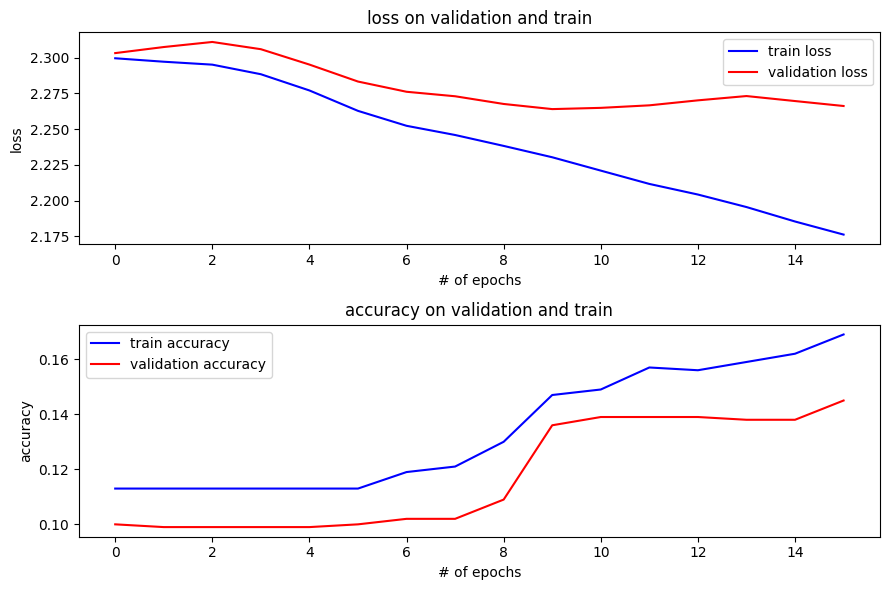

In [24]:
full=1000
model=Neuralnetwork(config)
train(model, train_X[:full], train_y[:full], val_X[:full], val_y[:full], config)

In [129]:
modelTest(model,val_X[:full], val_y[:full])

(2.30280614808669, 0.078)

In [105]:
val_y[:full].shape[0]

2000

In [111]:
np.mean(np.array([[[1,2,5],[2,4,5]],[[1,3,5],[2,4,5]]]))

3.25

In [125]:
model.loss(val_y[:full]+1, targets=val_y[:full])

-0.06931471805599465

In [137]:
np.argmax(np.array([[0,2],[5,4]]),axis=1)==[1,0]

array([ True,  True])